In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

In [143]:
palette = sns.color_palette("husl", 12)

# Dual values

In [4]:
# with open('logs/vol_str_False_2.0_51.11/sam.pickle', 'rb') as fp:
#     sam = pickle.load(fp)

In [5]:
# sam.mean(axis=1)

array([ 0.50020,  0.50055,  0.49998,  0.49999,  0.49908,  0.50015,
        0.49982,  0.50031,  0.49943,  0.50015,  0.50000,  0.49999,
        0.49884,  0.50031,  0.49973,  0.49886,  0.50019,  0.50024,
        0.50000,  0.49966,  0.49915,  0.49899,  0.50018,  0.50068,
        0.50010,  0.49991,  0.50055,  0.49898,  0.49907,  0.50033,
        0.50013,  0.49978,  0.49974,  0.49980,  0.50078,  0.50080,
        0.49947,  0.49989,  0.50009,  0.50063,  0.49927,  0.49966,
        0.50050,  0.50060,  0.50082,  0.50066,  0.49982,  0.49946,
        0.49993,  0.50083], dtype=float32)

In [15]:
with open('logs/vol_str_True_2.0_21.43/dual.pickle', 'rb') as fp:
    scot_dual = pickle.load(fp)

with open('logs/vol_str_False_2.0_51.11/dual.pickle', 'rb') as fp:
    sot_dual = pickle.load(fp)

with open('logs/vol_ot_2.0_50.10/dual.pickle', 'rb') as fp:
    ot_dual = pickle.load(fp)

In [5]:
ot_dual[:, -200:].mean(), ot_dual[:, -200:].std()

(0.72307473, 0.008277738)

In [6]:
sot_dual[:, -200:].mean(), sot_dual[:, -200:].std()

(0.69029367, 0.03834985)

In [7]:
scot_dual[:, -200:].mean(), scot_dual[:, -200:].std()

(0.65888584, 0.04553188)

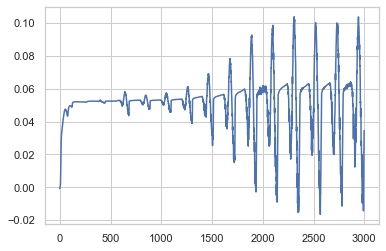

In [8]:
idx = 10
plt.plot(sot_dual[idx,:] - scot_dual[idx,:])
plt.show()

### M-W Test

In [16]:
sot_mean = sot_dual[:, -200:].mean(axis=1)

In [17]:
scot_mean = scot_dual[:, -200:].mean(axis=1)

In [18]:
stat, pval = mannwhitneyu(sot_mean, scot_mean, alternative='greater')

In [19]:
pval

5.8296004204553915e-09

In [20]:
sot_mean - scot_mean

array([ 0.01858,  0.02833,  0.05265, -0.00848,  0.05376, -0.00009,
        0.04531,  0.05143,  0.04548,  0.05240,  0.07309,  0.05768,
        0.01578,  0.06036,  0.04673,  0.05659, -0.00807, -0.00476,
        0.04751, -0.00815,  0.01019, -0.01869,  0.05884,  0.00262,
        0.00673,  0.06609,  0.04710,  0.04136,  0.01193,  0.06943,
       -0.00169,  0.00785,  0.00044,  0.04960,  0.05543,  0.05826,
        0.04807,  0.05431,  0.05128,  0.01145,  0.01745, -0.00758,
        0.04258,  0.05212,  0.04850,  0.02549,  0.08721,  0.06343,
        0.05762,  0.00263], dtype=float32)

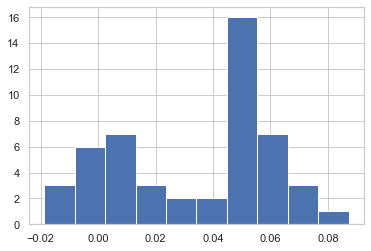

In [21]:
plt.hist((sot_mean - scot_mean).reshape(-1))
plt.savefig('OTmCOT2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

### Dual Graphs

In [52]:
df = []

st_idx = 499
gap = 100
sliced = ot_dual[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'dual':val, 'instance': ins*np.ones(n_period),
                                'algo':['OT',]*n_period, 'step': np.arange(n_period)}))
        
sliced = sot_dual[:, st_idx:]
sliced = sliced[:, ::gap]

for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'dual':val, 'instance': ins*np.ones(n_period),
                                'algo':['SOT',]*n_period, 'step': np.arange(n_period)}))
        
sliced = scot_dual[:, st_idx:]
sliced = sliced[:, ::gap]

for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'dual':val, 'instance': ins*np.ones(n_period),
                                'algo':['SCOT',]*n_period, 'step': np.arange(n_period)}))
        
df = pd.concat(df)

In [53]:
df

,dual,instance,algo,step
0,0.714673,0.0,OT,0
1,0.768988,0.0,OT,1
2,0.768407,0.0,OT,2
3,0.736419,0.0,OT,3
4,0.741943,0.0,OT,4
...,...,...,...,...
21,0.582999,49.0,SCOT,21
22,0.705255,49.0,SCOT,22
23,0.564619,49.0,SCOT,23
24,0.662825,49.0,SCOT,24


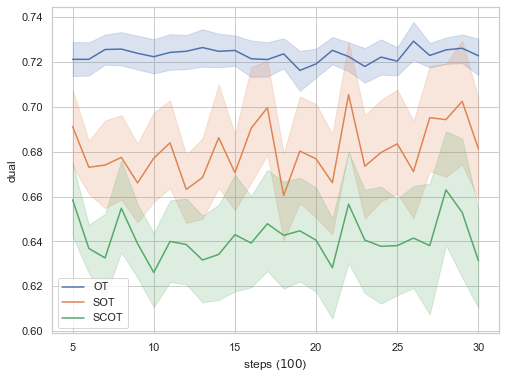

In [58]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 7)
g = sns.lineplot(data=df, x='step', y='dual', hue='algo', ci=95) #  palette=palette, style='Actions'
# g.despine(left=True)
# title
plt.legend(bbox_to_anchor=(1.05, 1), title='algo')
g.set(xlabel=r'steps ($100$)', ylabel='dual')
g.set_xticks(range(0, n_period, 5))
g.set_xticklabels(['5', '10', '15', '20', '25', '30'])
plt.legend(loc='best')
# plt.show()
plt.savefig('dual_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

# Lambda and cost

In [137]:
with open('logs/vol_str_True_2.0_21.43/cost.pickle', 'rb') as fp:
    scot_c = pickle.load(fp)

with open('logs/vol_str_False_2.0_51.11/cost.pickle', 'rb') as fp:
    sot_c = pickle.load(fp)



In [130]:
scot_c[:, -200:].mean(), scot_c[:, -200:].std()

(0.9106907, 0.5318884)

In [131]:
sot_c[:, -200:].mean(), sot_c[:, -200:].std()

(0.92257226, 0.5378924)

In [184]:
with open('logs/vol_ot_52.0_46.48/cost.pickle', 'rb') as fp:
    ot_c = pickle.load(fp)
ot_c[:, -200:].mean(), ot_c[:, -200:].std()

(1.0007454, 0.14611875)

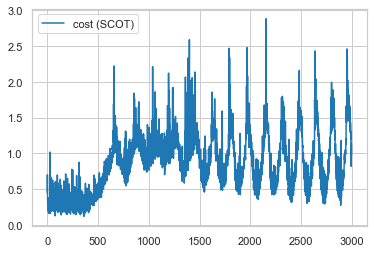

In [179]:
plt.plot(scot_c[0, :], color='tab:blue', label='cost (SCOT)')
plt.legend(loc='best')
plt.savefig('scot_cost_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

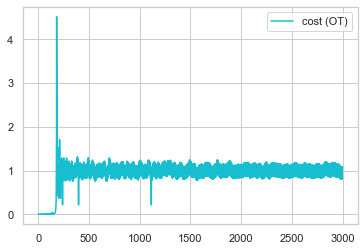

In [181]:
plt.plot(ot_c[0, :], color='tab:cyan', label='cost (OT)')
plt.legend(loc='best')
plt.savefig('ot_cost_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [147]:
df = []

st_idx = 0
gap = 100
sliced = scot_c[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'algo':['SCOT',]*n_period, 'step': np.arange(n_period)}))

sliced = sot_c[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'algo':['SOT',]*n_period, 'step': np.arange(n_period)}))

df = pd.concat(df)

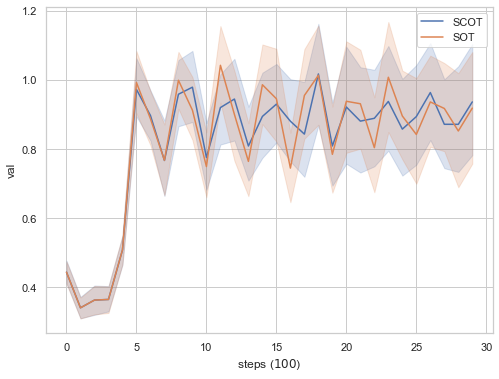

In [148]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 7)
g = sns.lineplot(data=df, x='step', y='val', hue='algo', ci=95) #  palette=palette, style='Actions'
# g.despine(left=True)
# title
plt.legend(bbox_to_anchor=(1.05, 1), title='cost')
g.set(xlabel=r'steps ($100$)')
plt.legend(loc='best')
# plt.savefig('params_52.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [164]:
with open('logs/vol_str_True_2.0_21.43/lam.pickle', 'rb') as fp:
    scot_lam = pickle.load(fp)

with open('logs/vol_str_False_2.0_51.11/lam.pickle', 'rb') as fp:
    sot_lam = pickle.load(fp)

with open('logs/vol_ot_2.0_32.47/lam.pickle', 'rb') as fp:
    ot_lam = pickle.load(fp)

In [53]:
scot_lam.shape

(50, 3000)

In [67]:
scot_lam[:, -200:].mean(), scot_lam[:, -200:].std()

(0.111353256, 0.12610137)

In [68]:
sot_lam[:, -200:].mean(), sot_lam[:, -200:].std()

(0.111329384, 0.1260384)

In [69]:
ot_lam[:, -200:].mean(), ot_lam[:, -200:].std()

(0.11240192, 0.0032854723)

In [152]:
df = []

st_idx = 500
gap = 100
sliced = scot_lam[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'algo':['SCOT',]*n_period, 'step': np.arange(n_period)}))

sliced = sot_lam[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'algo':['SOT',]*n_period, 'step': np.arange(n_period)}))

df = pd.concat(df)

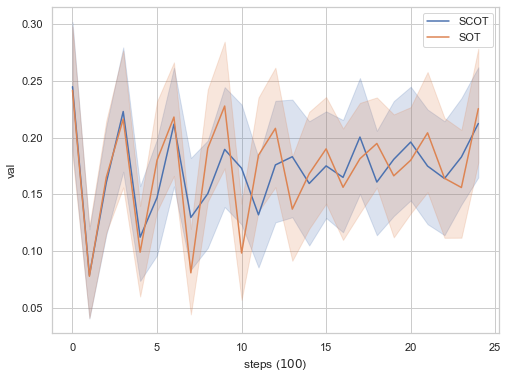

In [153]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 7)
g = sns.lineplot(data=df, x='step', y='val', hue='algo', ci=95) #  palette=palette, style='Actions'
# g.despine(left=True)
# title
plt.legend(bbox_to_anchor=(1.05, 1), title='lambda')
g.set(xlabel=r'steps ($100$)')
plt.legend(loc='best')
# plt.savefig('params_52.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

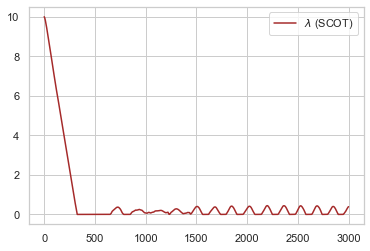

In [176]:
plt.plot(scot_lam[0, :], color='brown', label= r'$\lambda$ (SCOT)')
plt.legend(loc='best')
plt.savefig('scot_lam_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

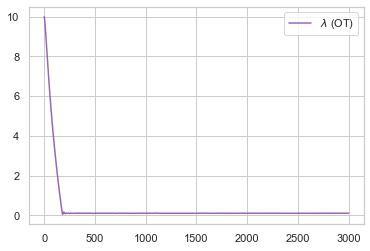

In [182]:
plt.plot(ot_lam[0, :], color='tab:purple', label= r'$\lambda$ (OT)')
plt.legend(loc='best')
plt.savefig('ot_lam_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [140]:
scot_lam_mean = scot_lam[:, -200:].mean(axis=1)

In [139]:
sot_lam_mean = sot_lam[:, -200:].mean(axis=1)

In [145]:
(scot_lam_mean - sot_lam_mean).mean()

0.00017112642

(array([ 1.00000,  3.00000,  3.00000,  9.00000,  16.00000,  7.00000,
         1.00000,  3.00000,  2.00000,  5.00000]),
 array([-0.10221, -0.08148, -0.06076, -0.04004, -0.01932,  0.00140,
         0.02212,  0.04284,  0.06357,  0.08429,  0.10501], dtype=float32),
 <BarContainer object of 10 artists>)

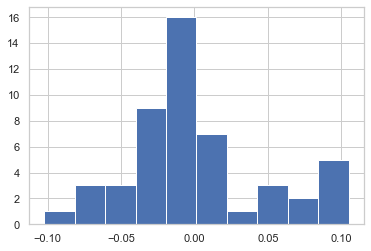

In [142]:
plt.hist(scot_lam_mean - sot_lam_mean)

# Jacobi params

## SCOT

In [17]:
with open('logs/vol_str_True_252.0_36.24/kappa.pickle', 'rb') as fp:
    scot_kappa = pickle.load(fp)

with open('logs/vol_str_True_252.0_36.24/mu.pickle', 'rb') as fp:
    scot_mu = pickle.load(fp)

with open('logs/vol_str_True_252.0_36.24/sigma.pickle', 'rb') as fp:
    scot_sigma = pickle.load(fp)

In [18]:
scot_kappa[:, -200:].mean(), scot_kappa[:, -200:].std()

(3.7928495, 0.30522996)

In [21]:
scot_mu[:, -200:].mean(), scot_mu[:, -200:].std()

(2.4896572, 0.3018847)

In [22]:
scot_sigma[:, -200:].mean(), scot_sigma[:, -200:].std()

(0.114539795, 0.025060158)

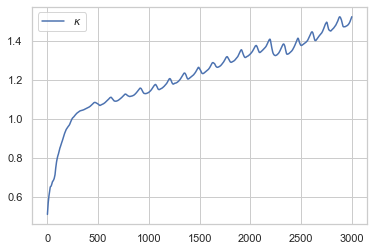

In [88]:
plt.plot(scot_kappa[10, :], label=r'$\kappa$')
plt.legend(loc='best')
plt.savefig('scot_kappa_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

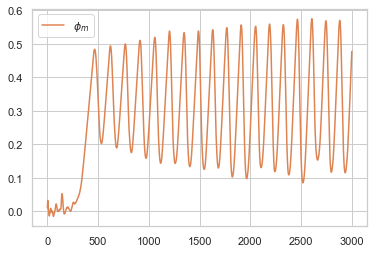

In [87]:
plt.plot(scot_mu[10, :], color=sns.color_palette()[1], label=r'$\phi_m$')
plt.legend(loc='best')
plt.savefig('scot_phi_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

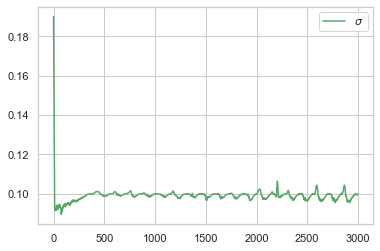

In [89]:
plt.plot(scot_sigma[10, :], color=sns.color_palette()[2], label=r'$\sigma$')
plt.legend(loc='best')
plt.savefig('scot_sigma_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [62]:
df = []

st_idx = 0
gap = 100
sliced = scot_kappa[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'params':['scot-kappa',]*n_period, 'step': np.arange(n_period)}))
        
sliced = scot_mu[:, st_idx:]
sliced = sliced[:, ::gap]

for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'params':['scot-phi',]*n_period, 'step': np.arange(n_period)}))
        
sliced = scot_sigma[:, st_idx:]
sliced = sliced[:, ::gap]

for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'params':['scot-sigma',]*n_period, 'step': np.arange(n_period)}))
        
df = pd.concat(df)

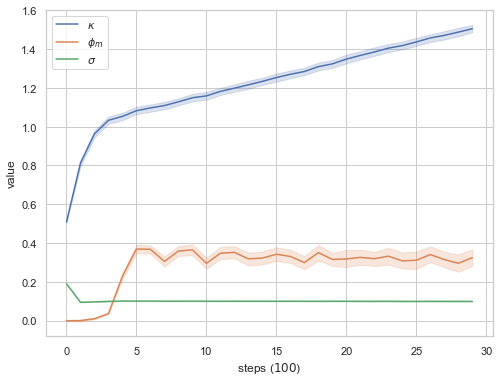

In [79]:
plt.figure(figsize=(8,6))
g = sns.lineplot(data=df, x='step', y='val', hue='params', ci=95) #   style='Actions'
# g.despine(left=True)
# title
plt.legend(bbox_to_anchor=(1.05, 1), title='params')
g.set(xlabel=r'steps ($100$)', ylabel='value')
plt.legend(labels=[r'$\kappa$', r'$\phi_m$', r'$\sigma$'], loc='best')
plt.savefig('params_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

## SOT

In [39]:
with open('logs/vol_str_False_252.0_06.35/kappa.pickle', 'rb') as fp:
    sot_kappa = pickle.load(fp)

with open('logs/vol_str_False_252.0_06.35/mu.pickle', 'rb') as fp:
    sot_mu = pickle.load(fp)

with open('logs/vol_str_False_252.0_06.35/sigma.pickle', 'rb') as fp:
    sot_sigma = pickle.load(fp)

In [40]:
sot_kappa[:, -200:].mean(), sot_kappa[:, -200:].std()

(3.7928965, 0.30512315)

In [41]:
sot_mu[:, -200:].mean(), sot_mu[:, -200:].std()

(2.4896784, 0.30199715)

In [42]:
sot_sigma[:, -200:].mean(), sot_sigma[:, -200:].std()

(0.1145728, 0.025226744)

In [64]:
df = []

st_idx = 0
gap = 100
sliced = sot_kappa[:, st_idx:]
sliced = sliced[:, ::gap]
n_ins, n_period = sliced.shape
for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'params':['sot-kappa',]*n_period, 'step': np.arange(n_period)}))
        
sliced = sot_mu[:, st_idx:]
sliced = sliced[:, ::gap]

for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'params':['sot-phi',]*n_period, 'step': np.arange(n_period)}))
        
sliced = sot_sigma[:, st_idx:]
sliced = sliced[:, ::gap]

for ins in range(n_ins):
        val = sliced[ins, :]
        df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period),
                                'params':['sot-sigma',]*n_period, 'step': np.arange(n_period)}))
        
df = pd.concat(df)

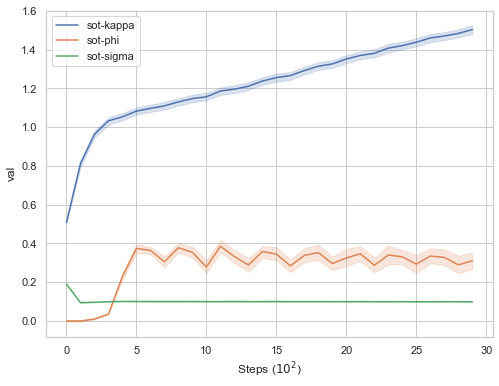

In [65]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 7)
g = sns.lineplot(data=df, x='step', y='val', hue='params', ci=95) #  palette=palette, style='Actions'
# g.despine(left=True)
# title
plt.legend(bbox_to_anchor=(1.05, 1), title='params')
g.set(xlabel=r'Steps ($10^2$)')
plt.legend(loc='best')
plt.show()

In [69]:
np.mean(np.abs(scot_kappa - sot_kappa))

0.01730549

In [72]:
np.mean(np.abs(sot_mu - scot_mu))

0.08199372

# Volatility Paths

In [95]:
with open('logs/vol_str_True_2.0_21.43/x_hist.pickle', 'rb') as fp:
    scot_x = pickle.load(fp)

with open('logs/vol_str_True_2.0_21.43/y_hist.pickle', 'rb') as fp:
    scot_y = pickle.load(fp)

with open('logs/vol_str_False_2.0_51.11/x_hist.pickle', 'rb') as fp:
    sot_x = pickle.load(fp)

with open('logs/vol_str_False_2.0_51.11/y_hist.pickle', 'rb') as fp:
    sot_y = pickle.load(fp)

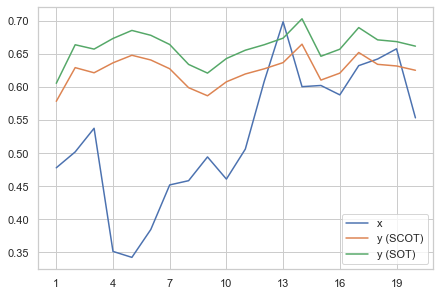

In [124]:
idx = 1
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(sot_x[idx, :], label='x')
ax.plot(scot_y[idx, :], label='y (SCOT)')
ax.plot(sot_y[idx, :], label='y (SOT)')
ax.legend(loc='best')
ax.set_xticks(range(0, 20, 3))
ax.set_xticklabels(['1', '4', '7', '10', '13', '16', '19'])
# plt.show()
plt.savefig('path_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [110]:
with open('logs/vol_str_True_252.0_36.24/x_hist.pickle', 'rb') as fp:
    scot_x_252 = pickle.load(fp)

with open('logs/vol_str_True_252.0_36.24/y_hist.pickle', 'rb') as fp:
    scot_y_252 = pickle.load(fp)

with open('logs/vol_str_False_252.0_06.35/x_hist.pickle', 'rb') as fp:
    sot_x_252 = pickle.load(fp)

with open('logs/vol_str_False_252.0_06.35/y_hist.pickle', 'rb') as fp:
    sot_y_252 = pickle.load(fp)

In [111]:
np.sum(np.abs(scot_y_252 - sot_y_252))

1.3886421

In [95]:
scot_y_252.shape

(50, 20)

In [96]:
np.sum(scot_y_252 > sot_y_252)/1000

0.42

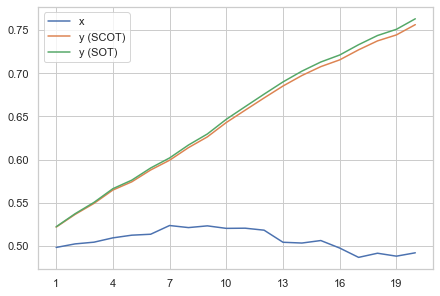

In [125]:
idx = 10
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(sot_x_252[idx, :], label='x')
ax.plot(scot_y_252[idx, :], label='y (SCOT)')
ax.plot(sot_y_252[idx, :], label='y (SOT)')
ax.legend(loc='best')
ax.set_xticks(range(0, 20, 3))
ax.set_xticklabels(['1', '4', '7', '10', '13', '16', '19'])
# plt.show()
plt.savefig('path_252.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [126]:
with open('logs/vol_ot_2.0_32.47/x_hist.pickle', 'rb') as fp:
    ot_x = pickle.load(fp)

with open('logs/vol_ot_2.0_32.47/y_hist.pickle', 'rb') as fp:
    ot_y = pickle.load(fp)

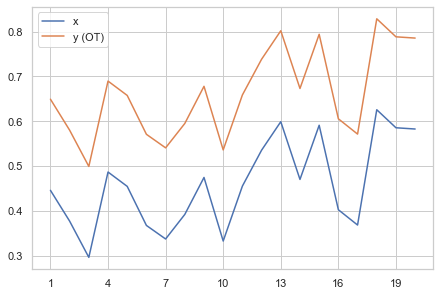

In [128]:
idx = 0
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(ot_x[idx, :], label='x')
ax.plot(ot_y[idx, :], label='y (OT)')
ax.legend(loc='best')
ax.set_xticks(range(0, 20, 3))
ax.set_xticklabels(['1', '4', '7', '10', '13', '16', '19'])
# plt.show()
plt.savefig('path_ot_2.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)